In [1]:
# Python 3.6 version
import sys
sys.path.append('../py3_paleo_scrape/')
from py3_paleo_scrape import make_df

import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
# get paleoclimatological data from North America for the Early Holocene (11.7-8.2 ky B.P.;Walker et al. 2012) 

df = make_df()

1. enter continent: North America
2. set earliest year?: (True or False) True
2.5 enter earliest year needed: 11700
3. set latest year?: (True or False) True
3.5 enter latest year needed: 8200
4. getting data, please wait

 total number of studies = 316 

5. set start of index? (True or False) T
5.5 starting index (number): 0
6. set end of index? (True or False) f
download starting... 


 download complete...


In [7]:
df.head(2)

,dataType,date,earliest_BP,lat,lon,maxElevation,most_recent_BP,online_link,study name,xmlId
0,PALEOLIMNOLOGY,2010-11-17,200000,b'70.55',b'-68.95',195,907,https://www.ncdc.noaa.gov/paleo/study/9896,"200KYr Midge Temperature, Diatom pH, and C/N D...",8788
1,PALEOLIMNOLOGY,1994-07-01,9860,b'45.86694',b'-95.80361',None,-32,https://www.ncdc.noaa.gov/paleo/study/5473,A High-Resolution Record of Climatic Change in...,652


In [4]:
df.dataType.value_counts()

PLANT MACROFOSSILS         80
PALEOLIMNOLOGY             78
ICE CORES                  77
FIRE HISTORY               35
SPELEOTHEMS                20
OTHER COLLECTIONS           8
CLIMATE RECONSTRUCTIONS     5
INSECT                      5
PALEOCEANOGRAPHY            3
LAKE LEVELS                 2
LOESS                       1
POLLEN                      1
Name: dataType, dtype: int64

In [5]:
# identify outliers -> those with large range of longitude and latitude values
outliers = np.where([str(i).startswith('[') for i in df.lat])
df.iloc[outliers]

,dataType,date,earliest_BP,lat,lon,maxElevation,most_recent_BP,online_link,study name,xmlId
52,PALEOCEANOGRAPHY,2014-04-18,9660,"[b'-98', b'-98']","[b'31', b'-89']",None,150,https://www.ncdc.noaa.gov/paleo/study/16361,Central US Gulf Coast Holocene Relative Sea-Le...,14088
61,PALEOCEANOGRAPHY,2008-04-18,9210,"[b'-77', b'-77']","[b'40', b'-76']",None,6600,https://www.ncdc.noaa.gov/paleo/study/8681,Cronin et al. 2007 Chesapeake Bay 8.2k Sea Lev...,2772
81,CLIMATE RECONSTRUCTIONS,1994-06-21,18000,"[b'-100', b'-100']","[b'50', b'-50']",None,0,https://www.ncdc.noaa.gov/paleo/study/16442,"Eastern North America 18,000 Year Vegetation M...",14168
136,CLIMATE RECONSTRUCTIONS,2018-02-21,22000,"[b'-60', b'-60']","[b'82', b'-20']",None,-60,https://www.ncdc.noaa.gov/paleo/study/23430,"Greenland 22,000 Year Seasonal Temperature Rec...",21594
137,OTHER COLLECTIONS,2016-11-10,305000,"[b'-60', b'-60']","[b'82', b'-20']",None,331,https://www.ncdc.noaa.gov/paleo/study/20776,Greenland Cosmogenic Exposure Ages Database,18613
138,ICE CORES,2016-12-21,11000,"[b'-60', b'-60']","[b'82', b'-20']",None,0,https://www.ncdc.noaa.gov/paleo/study/21092,Greenland Ice Core (GICC05) and Radiocarbon (I...,19032
140,PALEOCEANOGRAPHY,2013-11-27,145100,"[b'-55', b'-55']","[b'68', b'-45']",-3460,6700,https://www.ncdc.noaa.gov/paleo/study/15614,"Greenland Stream Sediments, Eirik Drift Marine...",13417
164,LOESS,2001-06-18,34000,"[b'-102', b'-102']","[b'48', b'-84']",None,10000,https://www.ncdc.noaa.gov/paleo/study/5603,Kohfeld and Harrison 2001 Mid-continental USA ...,2678
222,CLIMATE RECONSTRUCTIONS,2018-02-01,11000,"[b'-170', b'-170']","[b'70', b'-50']",None,0,https://www.ncdc.noaa.gov/paleo/study/22992,North America and Europe Holocene Gridded Temp...,21381
257,OTHER COLLECTIONS,2010-09-16,10800,"[b'-71.45', b'-71.45']","[b'70.97', b'-70.29']",40,9800,https://www.ncdc.noaa.gov/paleo/study/9637,Sam Ford Fjord early Holocene Laurentide Glaci...,8625


In [6]:
# drop outliers and reset the index
working_df = df.drop(outliers[0], axis=0).reset_index()
working_df = working_df.drop('index', axis=1)
working_df.columns = ['type', 'date', 'earliest_BP', 'latitude', 'longitude', 'Elevation', 'most_recent_BP', 'online_link', 'study desc', 'xmlId']
working_df.longitude = pd.to_numeric(working_df.longitude)
working_df.latitude = pd.to_numeric(working_df.latitude)
working_df.Elevation = pd.to_numeric(working_df.Elevation)
working_df.tail(3)

,type,date,earliest_BP,latitude,longitude,Elevation,most_recent_BP,online_link,study desc,xmlId
301,PLANT MACROFOSSILS,2001-08-07,12820,46.50,-92.56667,358.0,11083,https://www.ncdc.noaa.gov/paleo/study/7900,"Wright, H.E., Blackhoof Site (BLKHOOF) North A...",3097
302,PALEOLIMNOLOGY,2014-01-24,17900,43.48,-109.89000,2816.0,-45,https://www.ncdc.noaa.gov/paleo/study/16096,Wyoming 17KYr Lake Sediment Data and Moisture ...,13859
303,PLANT MACROFOSSILS,2001-08-07,11190,44.10,-78.33334,188.0,0,https://www.ncdc.noaa.gov/paleo/study/7984,"Yu, Z., Paynter Marsh (PAYNTER) North American...",2998


In [8]:
# Plotting
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] =(16,10)


m = Basemap(projection='merc', lat_0 = 20, lon_0 = -5, resolution = 'l', area_thresh = 0.1, \
    llcrnrlon=-169.25, llcrnrlat=10,
    urcrnrlon=-20., urcrnrlat=80.)

Text(0.5, 1.0, 'Study sites')

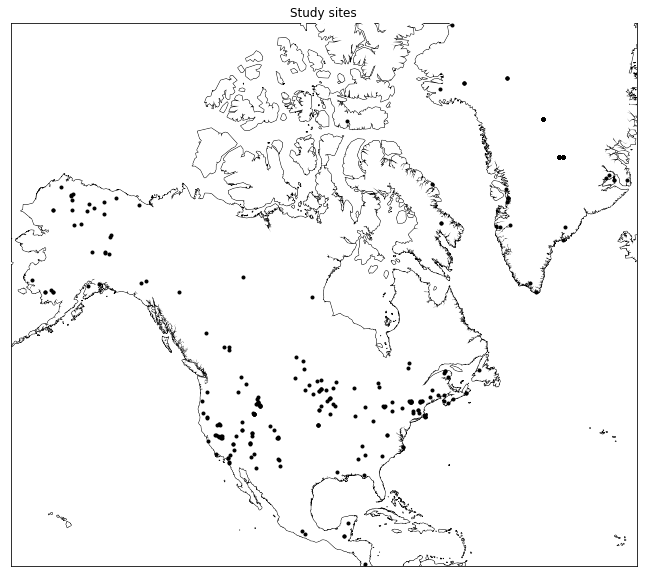

In [9]:
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='white',lake_color='white', zorder=5)

lons = working_df['longitude'].values
lats = working_df['latitude'].values
lon, lat = np.meshgrid(lons, lats)
x,y = m(lons, lats)
m.plot(x, y, 'o',color='k', markersize=3, zorder=10)
plt.title('Study sites')

In [10]:
val_counts = pd.DataFrame(working_df.type.value_counts())
val_counts.columns = ['Total studies']
val_counts

,Total studies
PLANT MACROFOSSILS,80
PALEOLIMNOLOGY,78
ICE CORES,76
FIRE HISTORY,35
SPELEOTHEMS,20
OTHER COLLECTIONS,6
INSECT,4
CLIMATE RECONSTRUCTIONS,2
LAKE LEVELS,2
POLLEN,1


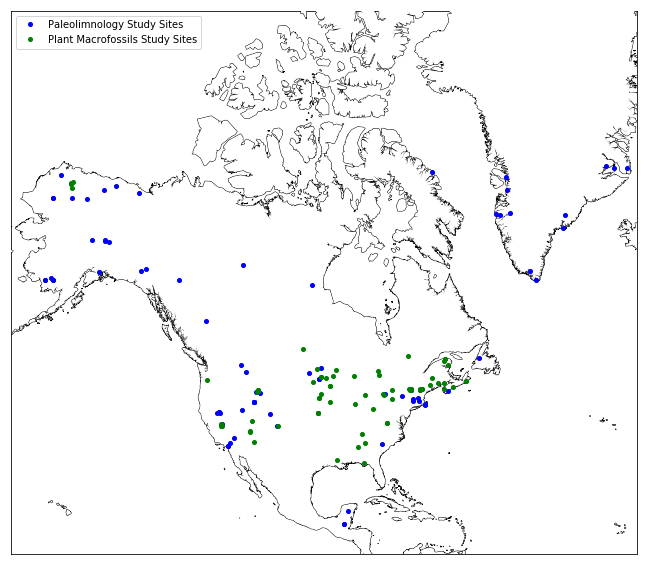

In [11]:
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='white',lake_color='white', zorder=5)

# Paleolimnology studies
lons = working_df['longitude'][working_df.type == 'PALEOLIMNOLOGY'].values
lats = working_df['latitude'][working_df.type == 'PALEOLIMNOLOGY'].values
lon, lat = np.meshgrid(lons, lats)
x,y = m(lons, lats)

m.plot(x, y, 'o', color='blue', markersize=4, zorder=10)

# Plant Macrofossils studies
lons = working_df['longitude'][working_df.type == 'PLANT MACROFOSSILS'].values
lats = working_df['latitude'][working_df.type == 'PLANT MACROFOSSILS'].values
lon, lat = np.meshgrid(lons, lats)
x,y = m(lons, lats)

m.plot(x, y, 'o', color='green', markersize=4, zorder=10)


plt.legend(['Paleolimnology Study Sites','Plant Macrofossils Study Sites'])

Text(0.5, 1.0, 'Kernel Density Plot of Plant Macrofossil study sites (available for 10kyB.P. to 5kyB.P)')

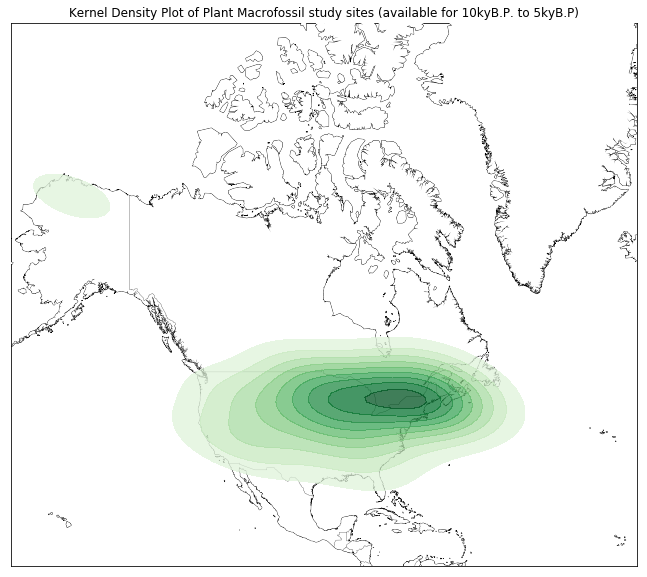

In [12]:
m.drawcoastlines(linewidth=0.75, zorder=2)
m.drawcountries(linewidth=0.25, zorder=6)

m.fillcontinents(color='white',lake_color='white', zorder=4)

lons = working_df['longitude'][working_df.type == 'PLANT MACROFOSSILS'].values
lats = working_df['latitude'][working_df.type == 'PLANT MACROFOSSILS'].values
lon, lat = np.meshgrid(lons, lats)
x,y = m(lons, lats)

# Gaussian kernel density plot
sns.kdeplot(x,y, cmap="Greens", shade=True, shade_lowest=False, alpha=.75, zorder=10)

plt.title('Kernel Density Plot of Plant Macrofossil study sites (available for 10kyB.P. to 5kyB.P)')